In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("ss_ex_1.xlsx", parse_dates = ['일자']) #지정한 컬럼을 날짜 타입으로 바꿔줌
#df.info() -> 일자가 object임
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
1,2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2,2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
3,2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
4,2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550
...,...,...,...,...,...,...,...,...,...,...,...
122,2021-02-19,82600,500,0.61,82300,82800,81000,25880879,2121275310450,493104038630000,5969782550
123,2021-02-18,82100,-1100,-1.32,83200,83600,82100,21327683,1762033944231,490119147355000,5969782550
124,2021-02-17,83200,-1700,-2.00,83900,84200,83000,18307735,1526409421172,496685908160000,5969782550
125,2021-02-16,84900,700,0.83,84500,86000,84200,20483100,1740792201903,506834538495000,5969782550


## 다운 샘플링
:  더 짧은 간격의 데이터를 더 긴 간격으로 요약하는 방식

## 월별 / 분기별 집계값 보기

### 전처리 - 파생변수

In [354]:
df = df.sort_values("일자")
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
126,2021-02-15,84200,2600,3.19,83800,84500,83300,23529706,1978336504100,502655690710000,5969782550
125,2021-02-16,84900,700,0.83,84500,86000,84200,20483100,1740792201903,506834538495000,5969782550
124,2021-02-17,83200,-1700,-2.00,83900,84200,83000,18307735,1526409421172,496685908160000,5969782550
123,2021-02-18,82100,-1100,-1.32,83200,83600,82100,21327683,1762033944231,490119147355000,5969782550
122,2021-02-19,82600,500,0.61,82300,82800,81000,25880879,2121275310450,493104038630000,5969782550
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550
3,2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2,2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
1,2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550


In [355]:
#df['일자'].dt.quarter
df2 = df[['일자', '시가', '저가', '고가', '종가']].copy()
df2['year'] = df2['일자'].dt.year
df2['month'] = df2['일자'].dt.month

a = df2.groupby(['year','month'])
a.get_group((2021,2)) #group을 데이터 프레임으로 보는 방법

,일자,시가,저가,고가,종가,year,month
126,2021-02-15,83800,83300,84500,84200,2021,2
125,2021-02-16,84500,84200,86000,84900,2021,2
124,2021-02-17,83900,83000,84200,83200,2021,2
123,2021-02-18,83200,82100,83600,82100,2021,2
122,2021-02-19,82300,81000,82800,82600,2021,2
121,2021-02-22,83800,82200,84200,82200,2021,2
120,2021-02-23,81200,81100,82900,82000,2021,2
119,2021-02-24,81800,81300,83600,82000,2021,2
118,2021-02-25,84000,83000,85400,85300,2021,2
117,2021-02-26,82800,82000,83400,82500,2021,2


### 월별

In [357]:
#1
how = {
    "시가" : "first",
    "저가" : "min",
    "고가" : "max",
    "종가" : "last"
}

a.agg(how) #객체에서 여러 개의 함수를 적용하여 데이터를 집계할 때 사용하는 메소드

시가     저가     고가     종가
year month                            
2021 2      83800  81000  86000  82500
     3      85100  80600  85300  81400
     4      82500  81500  86200  81500
     5      81000  78400  83500  80500
     6      80500  79600  83000  80700
     7      80500  78100  81300  78500
     8      79200  74100  83300  74400

In [358]:
#2
df.groupby(pd.Grouper(key = "일자", freq = "d")).agg(how)

,시가,저가,고가,종가
일자,,,,
2021-02-15,83800.0,83300.0,84500.0,84200.0
2021-02-16,84500.0,84200.0,86000.0,84900.0
2021-02-17,83900.0,83000.0,84200.0,83200.0
2021-02-18,83200.0,82100.0,83600.0,82100.0
2021-02-19,82300.0,81000.0,82800.0,82600.0
...,...,...,...,...
2021-08-09,81500.0,80900.0,82300.0,81500.0
2021-08-10,82300.0,80100.0,82400.0,80200.0
2021-08-11,79600.0,78500.0,79800.0,78500.0


### 분기별

In [360]:
df.groupby(pd.Grouper(key = "일자", freq = "3m")).agg(how) #3개월(분기)별로 집단화

,시가,저가,고가,종가
일자,,,,
2021-02-28,83800,81000,86000,82500
2021-05-31,85100,78400,86200,80500
2021-08-31,80500,74100,83300,74400


## 컬럼시프트

#### 거래량이 증가한 날은 총 몇일일까?

In [363]:
df = df.set_index("일자")

In [364]:
df['전일거래량'] = df['거래량'].shift(1) #행을 하나씩 밀어서 새 컬럼 생성
df[['거래량','전일거래량']]

,거래량,전일거래량
일자,,
2021-02-15,23529706,NaN
2021-02-16,20483100,23529706.0
2021-02-17,18307735,20483100.0
2021-02-18,21327683,18307735.0
2021-02-19,25880879,21327683.0
...,...,...
2021-08-09,15522581,13342623.0
2021-08-10,20362639,15522581.0
2021-08-11,30241137,20362639.0


In [365]:
cond = df['거래량'] > df['전일거래량']

print(f"상승일 : {len(df[cond])}")
print(f"영업일 : {len(df)}")

상승일 : 66
영업일 : 127


#### 모멘텀 전략 - 컬럼시프트 사용
: 자산이 한 추세를 계속해서 보인다면 추세를 유지하려는 경향이 있다\
: 과거 6일전의 종가 대비 당일 종가가 3%이상 높다면 상승장으로 판단해서 참여

In [367]:
a = df['종가'] / df['종가'].shift(6)
cond = a >= 1.03
len(df[cond]) #12번의 시장참여 기회가 있었다 

12

In [368]:
#시그널이 있던 다음날 시가에 사서 종가에 판다면 수익이 얼마인지
#약 4%(0.04)의 손실이 있었다
cond2 = cond.shift(1).fillna(False)

s = df.loc[cond2, "종가"] / df.loc[cond2, "시가"]
s.cumprod()[-1] #총수익률 함수

0.9137589546178475

## 모멘텀 전략(컬럼시프트) 실습
cj씨푸드에 간단한 모멘텀 전략 사용하기

In [3]:
df = pd.read_csv("CJ씨푸드.csv")
df

,Date,Open,High,Low,Close,Volume,Change
0,2000-06-26,2136,2136,1956,1955,772800,NaN
1,2000-06-27,1996,1996,1896,1955,42000,0.000000
2,2000-06-28,2036,2036,1936,1975,11400,0.010230
3,2000-06-29,1996,1996,1956,1995,133500,0.010127
4,2000-06-30,2195,2195,1936,1995,88300,0.000000
...,...,...,...,...,...,...,...
5995,2024-10-11,3300,3330,3225,3230,228077,-0.021212
5996,2024-10-14,3240,3270,3150,3245,157354,0.004644
5997,2024-10-15,3260,3405,3235,3315,583924,0.021572
5998,2024-10-16,3400,3735,3245,3250,3775622,-0.019608


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

a = df['Close'] / df['Close'].shift(6) #현재 종가 / 6일전 종가

cond = a >= 1.03 #True, False의 Boolean Series(컬럼같은거)가 생성

len(df[cond]) #참여기회 계산 -> 1546일의 기회가 있었다

1546

In [5]:
cond

Date
2000-06-26    False
2000-06-27    False
2000-06-28    False
2000-06-29    False
2000-06-30    False
              ...  
2024-10-11    False
2024-10-14    False
2024-10-15    False
2024-10-16    False
2024-10-17    False
Name: Close, Length: 6000, dtype: bool

In [8]:
cond2 = cond.shift(1).fillna(False) #-> 1행을 False로 함
cond2 #전날에 3%이상의 이득을 낸 날이 많이 없음 = 다 False

Date
2000-06-26    False
2000-06-27    False
2000-06-28    False
2000-06-29    False
2000-06-30    False
              ...  
2024-10-11    False
2024-10-14    False
2024-10-15    False
2024-10-16    False
2024-10-17    False
Name: Close, Length: 6000, dtype: bool

### 내 수익에 관한 시물레이션 돌려보기

In [372]:
s = df.loc[cond2, 'Close'] / df.loc[cond2, 'Open'] #하루의 수익률
s.cumprod() #수익률 누적값

Date
2000-07-05    0.960983
2000-07-07    0.960520
2000-07-10    0.950896
2000-07-11    0.931934
2000-07-19    1.045228
                ...   
2024-09-24    0.000030
2024-09-25    0.000029
2024-09-27    0.000029
2024-09-30    0.000029
2024-10-02    0.000029
Length: 1546, dtype: float64

## 이동 평균선(rolling window)
: 일정 기간 동안의 데이터 평균을 계산하여 추세를 부드럽게 나타내는 지표
1) 컬럼시프트 활용 수동 계산
2) rolling window활용 자동 계산

In [374]:
df = pd.read_excel("ss_ex_1.xlsx", parse_dates = ['일자'])

df = df.sort_values("일자")
df = df.set_index("일자")

##1
df2 = df[['종가']]
df2["종가 D-1"] = df2['종가'].shift(1) #컬럼 시프트로 종가 구하기
df2["종가 D-2"] = df2['종가'].shift(2)
df2["MA3"] = (df2['종가'] + df2['종가 D-1'] + df2['종가 D-2']) / 3 #3일간의 이동평균선 : 수동계산


##2
df2["rolling3"] = df2['종가'].rolling(window = 3).mean() #rolling window로 3일간의 평균구하기 : 자동계산

### 시가가 5일 이동평균선을 돌파하면 상승추세하고 판단하고 참여
: 5일 이동 평균 > 20일 > 60일 > 120일이면 찐 상승 시장으로 판단

In [376]:
df = pd.read_excel("ss_ex_1.xlsx", parse_dates = ['일자'])

df = df.sort_values("일자")
df = df.set_index("일자")

df["MA5"] = df['종가'].rolling(window = 5).mean()

df["MA5"] < df["종가"]

print(len(df[cond])) #33일 정도 시장 참여 기회가 있었음
print(len(df)) #전체 시장이 열린 날 수

33
127


**시각화**

In [378]:
import matplotlib.pyplot as plt
df = pd.read_csv("CJ씨푸드.csv", parse_dates = ['Date'])
df = df.set_index("Date")

df["MA5"] = df['Close'].rolling(window = 5).mean() #5일치
df["MA20"] = df['Close'].rolling(window = 20).mean() 
df["MA60"] = df['Close'].rolling(window = 60).mean() 
df["MA120"] = df['Close'].rolling(window = 120).mean() 
df = df.dropna()

df2 = df[df.index.year == 2024]

<function matplotlib.pyplot.show(close=None, block=None)>

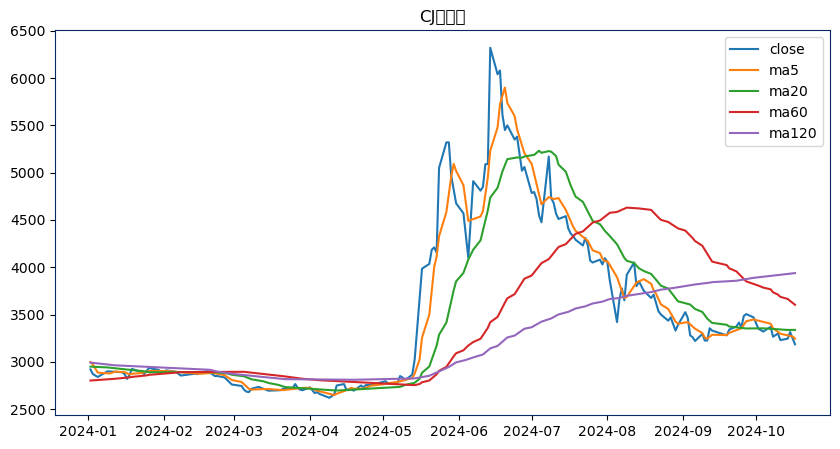

In [379]:
import koreanize_matplotlib
name = "CJ씨푸드"

plt.figure(figsize = (10,5))
plt.title(name)

plt.plot(df2['Close'])
plt.plot(df2['MA5'])
plt.plot(df2['MA20'])
plt.plot(df2['MA60'])
plt.plot(df2['MA120'])
plt.legend(['close', 'ma5', 'ma20', 'ma60', 'ma120']) #범례
plt.grid()
plt.show

## 이동평균선 실습
강한 상승 추세에 있는 데이터만 뽑아서 저장하기

In [ ]:
import os

for i in os.listdir("krx_data"): #폴더 안에 데이터 가져오는 법
    try:
            #"krx_data/" + i: i는 파일 이름을 나타내는 변수, 폴더 안에 있는 변수 불러오기
        df = pd.read_csv("krx_data/" +  i, parse_dates = ['Date']) 
        df = df.set_index("Date")
        
        df['MA5'] = df['Close'].rolling(window = 5).mean()
        df['MA20'] = df['Close'].rolling(window = 20).mean()
        df['MA60'] = df['Close'].rolling(window = 60).mean()
        df['MA120'] = df['Close'].rolling(window = 120).mean()
        df = df.dropna()
        
        df2 = df[df.index.year == 2024]
        a = df2.iloc[-1] #가장 최신날짜 = 오늘
        
        if a['MA120'] < a['MA60'] < a['MA20'] < a['MA5'] < a['Close']:
            plt.figure(figsize = (10, 5))
            plt.title(i)
            
            plt.plot(df2['Close'])
            plt.plot(df2['MA5'])
            plt.plot(df2['MA20'])
            plt.plot(df2['MA60'])
            plt.plot(df2['MA120'])
            plt.legend(['Close', 'ma5', 'ma20', 'ma60', 'ma120'])
            plt.grid()
            plt.savefig(f"MA/{i}.png")
            plt.close()

    except:
        continue

## 데이터 샘플링
: 전체 데이터셋에서 일부 데이터를 선택하여 사용하는 방법\
: 주로 데이터 분석, 머신러닝, 통계학 등에서 데이터의 크기를 줄이거나 대표성을 확보하기 위해 사용

In [15]:
df = pd.read_excel("ss_ex_1.xlsx", parse_dates = ['일자'])
df = df.sort_values("일자")
df = df.set_index("일자")

In [16]:
df2 = df[['시가', '저가', '고가','종가','거래량']]

**샘플링 기초**

In [17]:
#월 단위로 리샘플 -> 일자가 형식상 표현될 뿐 값이 기준에 맞춰가져와지는것
# 월말: M 월초:MS
# .first : 첫번째 데이터, .last : 마지막 데이터


#df.resample("M").first() 

df.resample("MS").last() #last없으면 Frame으로 출력이 안됨

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021-02-01,82500,-2800,-3.28,82800,83400,82000,38520800,3175845143233,492507060375000,5969782550
2021-03-01,81400,-800,-0.97,82400,82700,81400,17240518,1413779202400,485940299570000,5969782550
2021-04-01,81500,-200,-0.24,81900,82100,81500,18673197,1525090284512,486537277825000,5969782550
2021-05-01,80500,400,0.50,80300,80600,79600,13321324,1065281026200,480567495275000,5969782550
2021-06-01,80700,-300,-0.37,81100,81400,80700,13288643,1075902355151,481761451785000,5969782550
2021-07-01,78500,-500,-0.63,78900,78900,78500,13823411,1086488907610,468627930175000,5969782550
2021-08-01,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550


**리스트로 샘플링**

In [18]:
how = {
    "시가" : "first",
    "저가" : "min",
    "고가" : "max",
    "종가" : "last"
}

df2.resample("MS").agg(how) #집계함수로 보기좋게 표현

,시가,저가,고가,종가
일자,,,,
2021-02-01,83800,81000,86000,82500
2021-03-01,85100,80600,85300,81400
2021-04-01,82500,81500,86200,81500
2021-05-01,81000,78400,83500,80500
2021-06-01,80500,79600,83000,80700
2021-07-01,80500,78100,81300,78500
2021-08-01,79200,74100,83300,74400


In [19]:
df2.resample("3D").agg(how)

,시가,저가,고가,종가
일자,,,,
2021-02-15,83800.0,83000.0,86000.0,83200.0
2021-02-18,83200.0,81000.0,83600.0,82600.0
2021-02-21,83800.0,81100.0,84200.0,82000.0
2021-02-24,81800.0,81300.0,85400.0,82500.0
2021-02-27,NaN,NaN,NaN,NaN
2021-03-02,85100.0,82200.0,85300.0,82400.0
2021-03-05,81100.0,81100.0,82600.0,82100.0
2021-03-08,82900.0,80600.0,83000.0,80900.0
2021-03-11,81000.0,81000.0,83500.0,82800.0


In [20]:
df2.resample("12H").agg(how).ffill() 
#ffill() : 결측치를 이전 값으로 채우기

,시가,저가,고가,종가
일자,,,,
2021-02-15 00:00:00,83800.0,83300.0,84500.0,84200.0
2021-02-15 12:00:00,83800.0,83300.0,84500.0,84200.0
2021-02-16 00:00:00,84500.0,84200.0,86000.0,84900.0
2021-02-16 12:00:00,84500.0,84200.0,86000.0,84900.0
2021-02-17 00:00:00,83900.0,83000.0,84200.0,83200.0
...,...,...,...,...
2021-08-11 00:00:00,79600.0,78500.0,79800.0,78500.0
2021-08-11 12:00:00,79600.0,78500.0,79800.0,78500.0
2021-08-12 00:00:00,77100.0,76900.0,78200.0,77000.0


In [21]:
import numpy as np
temp = df2.resample("12H").agg(how)

#결측치가 있는 행을 찾는 코드
#행을 기준으로 nan인 아무거나 찾기
idx = temp.isna().any(axis = 1)

temp.loc[idx, "거래량"] = np.nan #결측치가 있는 행의 거래량컬럼에 NaN 값을 할당
temp2 = temp.ffill() #결측치가 있으면 이전 행의 값을 사용해서 결측치를 채움

temp2

,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-15 00:00:00,83800.0,83300.0,84500.0,84200.0,NaN
2021-02-15 12:00:00,83800.0,83300.0,84500.0,84200.0,NaN
2021-02-16 00:00:00,84500.0,84200.0,86000.0,84900.0,NaN
2021-02-16 12:00:00,84500.0,84200.0,86000.0,84900.0,NaN
2021-02-17 00:00:00,83900.0,83000.0,84200.0,83200.0,NaN
...,...,...,...,...,...
2021-08-11 00:00:00,79600.0,78500.0,79800.0,78500.0,NaN
2021-08-11 12:00:00,79600.0,78500.0,79800.0,78500.0,NaN
2021-08-12 00:00:00,77100.0,76900.0,78200.0,77000.0,NaN


#### 분기별 수익률

In [22]:
df = pd.read_excel("ss_ex_1.xlsx", parse_dates = ['일자'])
df = df.sort_values("일자")
df = df.set_index("일자")

In [23]:
df2 = df[['종가', '시가']]

##분기별 시가, 분기
#DataFrame : 새로운 데이터 프레임 형성
#to_frame : 시리즈를 데이터 프레임 형태로 
df_quarter = df2['시가'].resample('q').first().to_frame() #분기별로 샘플링해서 그 첫번째를 프레임으로
df_quarter['quarter'] = df_quarter.index.quarter

##일자별 종가, 분기
df2['quarter'] = df2.index.quarter
df2_daily = df2[['종가', 'quarter']].reset_index() #일자별로 종가 그리고 분기

In [24]:
#분기별 수익률 -> merge
r = df2_daily.merge(df_quarter, on = "quarter")
r['수익률'] = r['종가'] / r['시가']

r.set_index(['quarter', '일자'])

종가     시가       수익률
quarter 일자                                
1       2021-02-15  84200  83800  1.004773
        2021-02-16  84900  83800  1.013126
        2021-02-17  83200  83800  0.992840
        2021-02-18  82100  83800  0.979714
        2021-02-19  82600  83800  0.985680
...                   ...    ...       ...
3       2021-08-09  81500  80500  1.012422
        2021-08-10  80200  80500  0.996273
        2021-08-11  78500  80500  0.975155
        2021-08-12  77000  80500  0.956522
        2021-08-13  74400  80500  0.924224

[127 rows x 3 columns]

## 두 주식의 가격 비교
주식 가져오기

In [ ]:
#!pip install finance-datareader

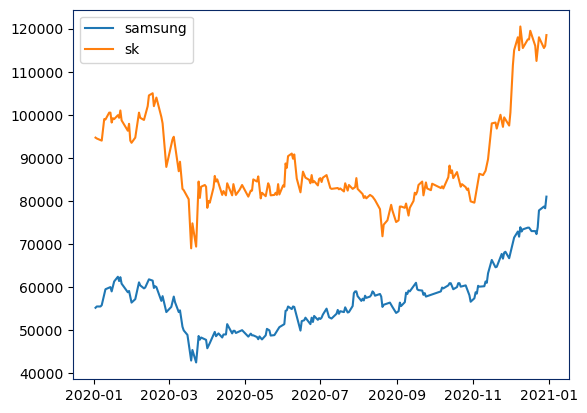

In [395]:
import FinanceDataReader as fdr

samsung = fdr.DataReader("005930", start = "2020-01-01", end = "2020-12-31") #인덱스는 기본적으로 날짜임, 필요시 reset_index하기
sk = fdr.DataReader("000660", start = "2020-01-01", end = "2020-12-31")

plt.plot(samsung.index, samsung['Close'])
plt.plot(sk.index, sk['Close'])
plt.legend(['samsung', 'sk'])
plt.grid()
plt.show()

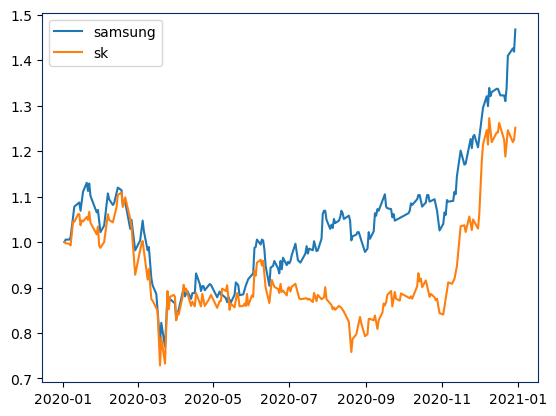

In [397]:
#시작 지점 맞춰서 비교하기 - 지수화
samsung_index = samsung['Close'] / samsung['Close'][0] #시작이 1이됨, 나누기가 close[0]이니까
sk_index = sk['Close'] / sk['Close'][0] # 시작=1

plt.plot(samsung.index, samsung_index) #인덱스로 날짜, 데이터는 맞춰서 비교하기 - 지수화
samsung_index = samsung['Close'] / samsung['Close'][0] #시작이 1이됨, 나누기가 close[0]이니까
sk_index = sk['Close'] / sk['Close'][0] # 시작=1

plt.plot(samsung.index, samsung_index) #인덱스로 날짜, 데이터는 지수화 시킨거
plt.plot(sk.index, sk_index)
plt.legend(['samsung', 'sk'])
plt.grid()
plt.show()

## 주식의 캔들차트 그리기

import mplfinance as mpf : 금융 데이터 시각화에 사용되는 파이썬 라이브러리
- 캔들 차트 (Candlestick Chart): 주식 차트에서 많이 사용되는 차트로, 시가(Open), 고가(High), 저가(Low), 종가(Close) 정보를 시각화
- OHLC 차트 (Open-High-Low-Close Chart): 시가, 고가, 저가, 종가를 선으로 연결하여 보여주는 차트
- 거래량 차트 (Volume Chart): 일정 기간 동안의 거래량을 시각화
- 이동 평균, 볼린저 밴드 등: 주식 시장의 다양한 지표들을 함께 시각화

In [ ]:
#!pip install mplfinance

In [401]:
import mplfinance as mpf 

#스킨 리스트
mpf.available_styles()

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']

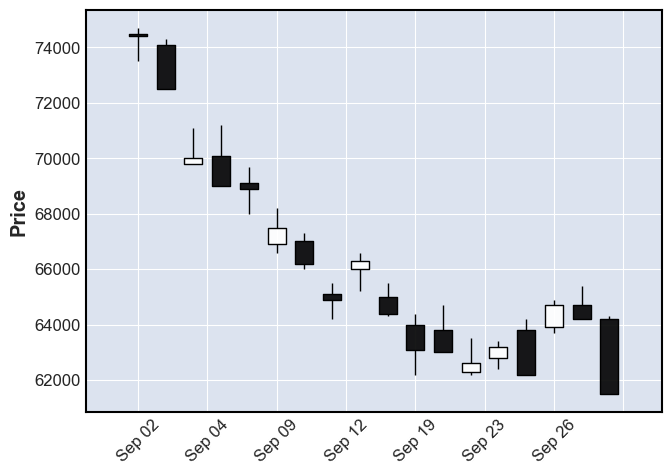

In [399]:
samsung = fdr.DataReader("005930")

mpf.plot(data = samsung.loc["2024-09"], type = 'candle')

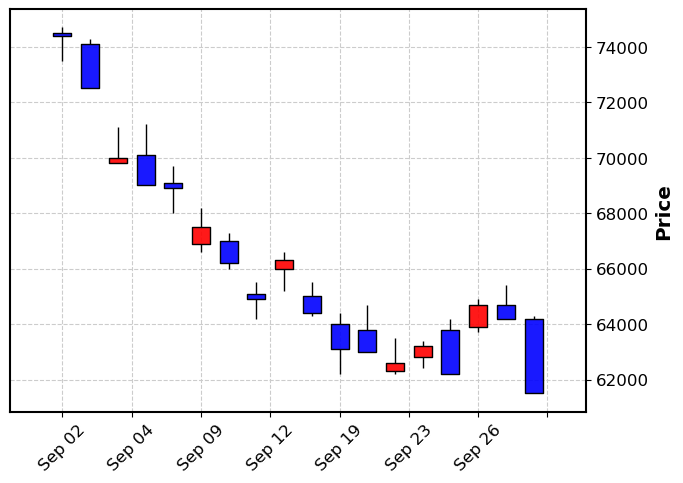

In [403]:
mc = mpf.make_marketcolors(
    up='r',  
    down='b' 
)

s = mpf.make_mpf_style(
    base_mpf_style="classic",
    marketcolors=mc 
)

mpf.plot(data=samsung.loc["2024-09"], type='candle', style=s)

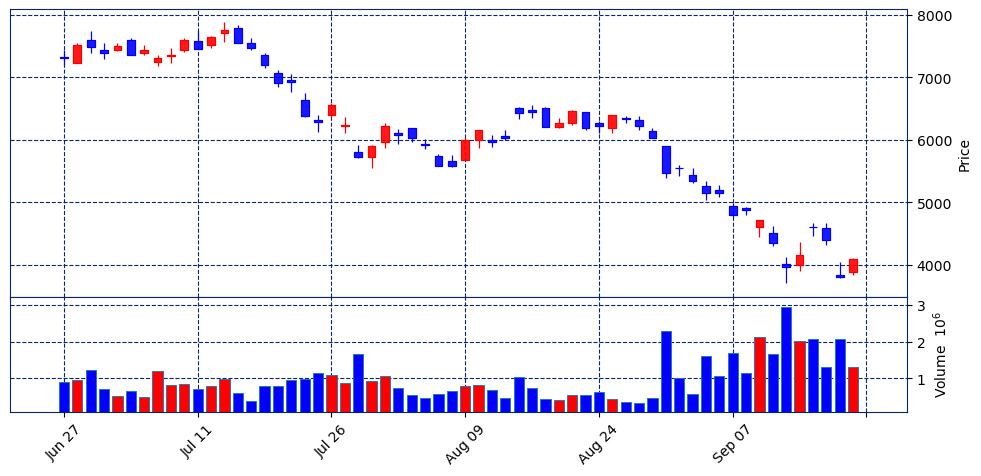

In [405]:
mc = mpf.make_marketcolors(
    up="r", 
    down="b", 
    edge="inherit",   # 캔들의 몸통색
    wick="inherit",   # 캔들의 머리/꼬리색
    volume="inherit"  # 거래량 색상
)

s = mpf.make_mpf_style(
    base_mpf_style="starsandstripes", 
    marketcolors=mc, 
    gridaxis='both',   # horizontal, vertical, both
    y_on_right=True    # False는 y축을 왼쪽에 표시
)

mpf.plot(
    data=samsung.iloc[:60], 
    type='candle', 
    style=s, 
    figratio=(13, 6),
    volume=True,      # volume : 거래량 차트도 같이 그려주기
    scale_width_adjustment=dict(volume=0.8, candle=1) #막대 너비, 캔들너비
)

## 볼린저 밴드
-표준편차 * 2 < 값 < 값 + 표준편차 * 2\
: 이동평균선 이용
: 주가의 평균과 표준 편차를 기반으로 하여, 주가가 **어느 정도의 변동성**을 가지고 움직이고 있는지를 확인

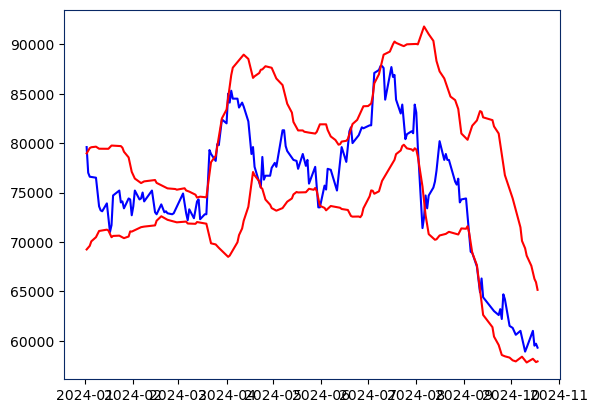

In [408]:
window = 20
std = 2

mean = samsung['Close'].rolling(window=20).mean()
std = samsung['Close'].rolling(window=20).std()

samsung['mean'] = mean
samsung['std'] = std

#정규분포에서 데이터를 약 95% 포함할 확률이 있는 구간
samsung["UB"] = samsung['mean'] + 2 * samsung['std']
samsung["LB"] = samsung['mean'] - 2 * samsung['std']

samsung2 = samsung[samsung.index.year == 2024]

plt.plot(samsung2['Close'], color = 'b')
#plt.plot(samsung2['mean'])
plt.plot(samsung2['UB'], color = 'r')
plt.plot(samsung2['LB'], color = 'r')
plt.grid()
plt.show()

### 볼린저밴드 실습 : 현재 가격이 LB보다 아래에 있는 종목 추출하기

In [411]:
for i in os.listdir("krx_data"):
    try:
        df = pd.read_csv("krx_data/" + i)
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.set_index("Date")
        
        df['mean'] = df['Close'].rolling(window=20).mean()
        df['std'] = df['Close'].rolling(window=20).std()
        
        df['UB'] = df['mean'] + 2 * df['std']
        df['LB'] = df['mean'] - 2 * df['std']
        df = df.dropna()
        
        today_data = df.iloc[-1]
        
        if today_data['Close'] < today_data['LB']:
            df2 = df[df.index.year == 2024]
            
            plt.figure()
            plt.plot(df2['Close'])
            plt.plot(df2['UB'])
            plt.plot(df2['LB'])
            plt.grid()
            plt.savefig(f"MA/{i}.png")
            plt.close()
            
    except:
        continue